In [1]:
import numpy as np

# Import prominence delineator
from prominence_delineator import ProminenceDelineator

# Auxilary functions for this example, allowing data loading and plotting
from utils import *

# Single Lead ECG Delineation

First, we load data from the Lobachevsky University Electrocardiography Database (LUDB), specifically the first lead of record 7, exhibiting inverted T-waves, a phenomenon that can indicate certain heart conditions. 

To load and plot this data, we use the auxiliary methods provided in this tutorial.

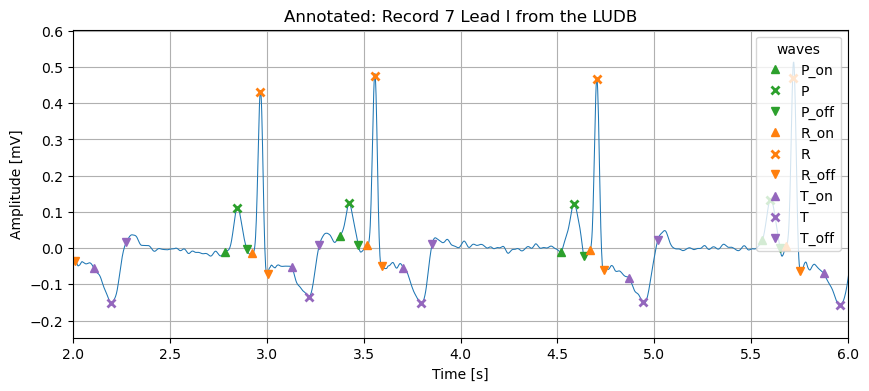

In [2]:
# Load first channel of 7th ECG record from the LUDB database
time, ecg, fs, annotations = load_ecg(record_name="7", filtered=True)

# Plot the ECG
plot_waves(time, ecg, annotations, title="Annotated: Record 7 Lead I from the LUDB", xlim=[2,6])


Next, we can start with the delineation.

1. Again, we start by loading the *unfiltered* data using the `load_ecg` function. 

2. An instance of the `ProminenceDelineator` class is created with the `sampling_frequency` parameter set to the sampling frequency of the ECG signals.

3. Then, R-peaks can be detected with any well functioning R-peak detector. Here, the FastNVG is used, which provides fast and sample accurate annotations and can be directly applied through the `find_rpeaks` method of the `ProminenceDelineator`.

4. Before passing the ECG signal into the delineator, it needs to be cleaned. The recommended ECG preprocessing is performed by calling the `clean_ecg`.

5. The morphology waves can then be extracted from the cleaned ECG signal using the `find_waves` method of the `ProminenceDelineator`. The ECG signal and detected R-peaks are required parameters for this method.

6. Finally, the delineated waves are visualized.

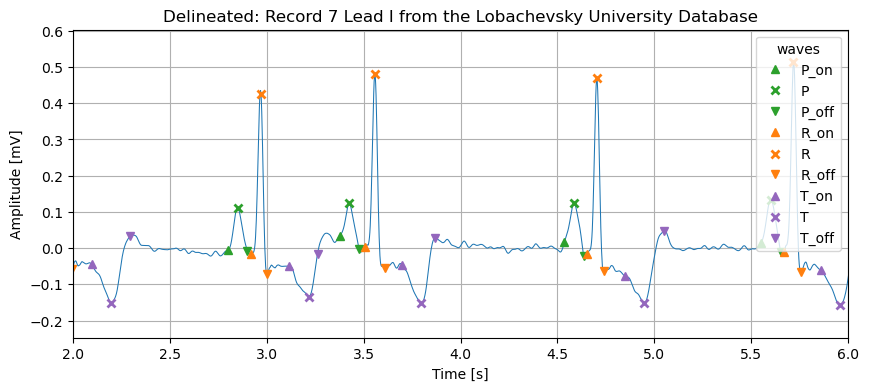

In [3]:
# Load unfiltered Data
time, ecg, fs, annotations = load_ecg(record_name="7", filtered=False)

# Create an instance of the ProminenceDelineator
PromDelineator = ProminenceDelineator(sampling_frequency=fs)

# Detect the R-peaks in the ECG signal
rpeaks = PromDelineator.find_rpeaks(ecg)

# Clean the ECG signal
ecg = PromDelineator.clean_ecg(ecg)

# Find waves in the ECG signal using the find_waves function
waves = PromDelineator.find_waves(ecg, rpeaks=rpeaks)

# Visualize the detected waves
plot_waves(time, ecg, waves, title="Delineated: Record 7 Lead I from the Lobachevsky University Database", xlim=[2,6])

The delineation output is returned in a dictionary. In this dictionary, each key-value pair corresponds to a type of wave and its detected positions.

In [4]:
waves

{'P': array([ 420,  923, 1425, 1713, 2293, 2801, 3302, 3803, 4296, 4802]),
 'R': array([ 479,  981, 1485, 1779, 2352, 2859, 3359, 3864, 4354, 4863]),
 'T': array([ 601, 1098, 1608, 1898, 2474, 2979, 3485, 3984, 4476, 4989]),
 'P_on': array([ 395,  898, 1400, 1688, 2268, 2776, 3277, 3778, 4271, 4777]),
 'P_off': array([ 445,  948, 1450, 1738, 2318, 2826, 3327, 3828, 4321, 4827]),
 'R_on': array([ 453,  956, 1459, 1754, 2327, 2835, 3336, 3837, 4339, 4837]),
 'R_off': array([ 494,  997, 1501, 1804, 2369, 2879, 3377, 3887, 4374, 4882]),
 'T_on': array([ 551, 1048, 1558, 1848, 2424, 2929, 3435, 3944, 4426, 4939]),
 'T_off': array([ 637, 1148, 1631, 1935, 2524, 3029, 3533, 4029, 4526, 4999])}

# Multi-Lead ECG Delineation

The process for multi-lead delineation is similar to single-lead delineation, but with a few key differences. The ECG signals are stored in a list or array named `multilead_ecg`, where each element corresponds to the ECG signal from a different lead. Similarly, the R-peaks are stored in a list called `multilead_rpeaks`, which contains sub-lists or sub-arrays representing the R-peak positions for a specific lead. 
Additionally, the annotations for the multi-lead waves are organized in a dictionary. In this dictionary, each key-value pair corresponds to a wave and its detections. The value is a list, where each element is another list or array, each containing the positions of the waves for that particular lead.

As for the single-lead processing, we start by loading some data using one of the auxiliary functions provided for this tutorial.

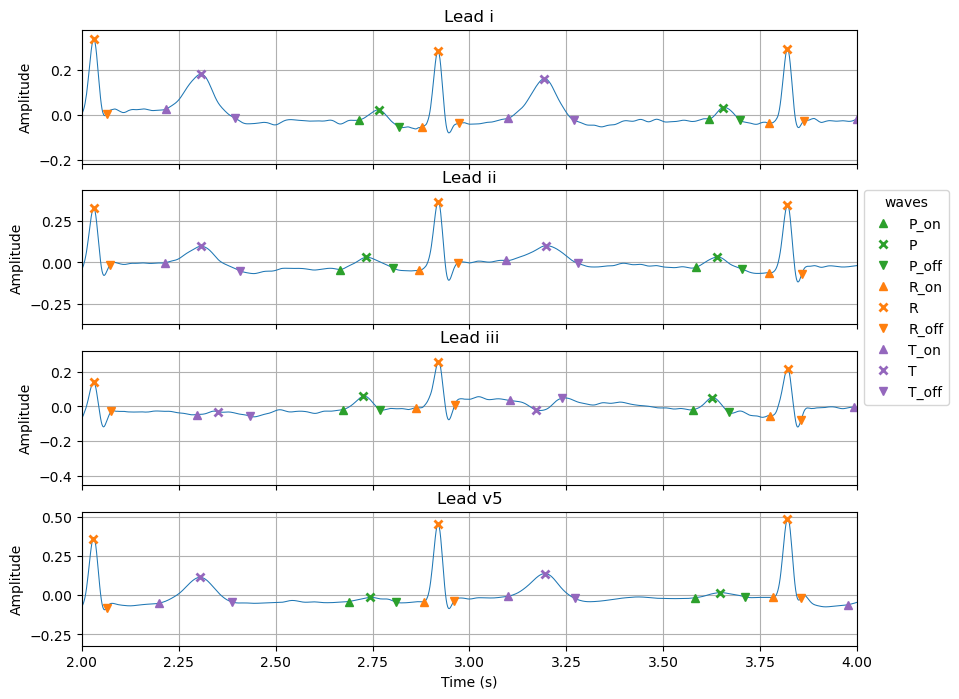

In [5]:
# Specify the leads to load
leads = ['i', 'ii', 'iii', "v5"]
# Load the multilead ECG record
time, multilead_ecg, fs, multilead_annotations = load_multilead_ecg(record_name="2", leads=leads, filtered=True)

# Visualize the multilead ECG
plot_multilead_ecg_annotations(time, multilead_ecg, multilead_annotations, leads, xlim=[2, 4])


Next, we can proceed with the multi-lead delineation.

1. As before, we start by loading the *unfiltered* data. However, this time we use the `load_multilead_ecg` function, specifying the record name and the leads we're interested in.

2. An instance of the `ProminenceDelineator` class is created, with the `sampling_frequency` parameter set to the sampling frequency of the multi-lead ECG signals.

3. R-peaks are then detected for each lead. We use the `find_rpeaks` method of the `ProminenceDelineator`, which implements a wrapper of the FastNVG R-peak detector, allowing to input directly multi-lead ECG data. Any well-functioning R-peak detector can be used for this, but here the FastNVG was chosen due to its speed and sample-accuracy.

4. Before passing the multi-lead ECG signals into the delineator, they need to be cleaned. This is done by calling the `clean_ecg` method of the `ProminenceDelineator` instance.

5. The morphology waves for each lead can then be extracted from the cleaned ECG signals using the `find_waves_multilead` method of the `ProminenceDelineator`. The cleaned ECG signals and detected R-peaks are required parameters for this method.

6. Finally, the delineated waves for each lead are visualized.

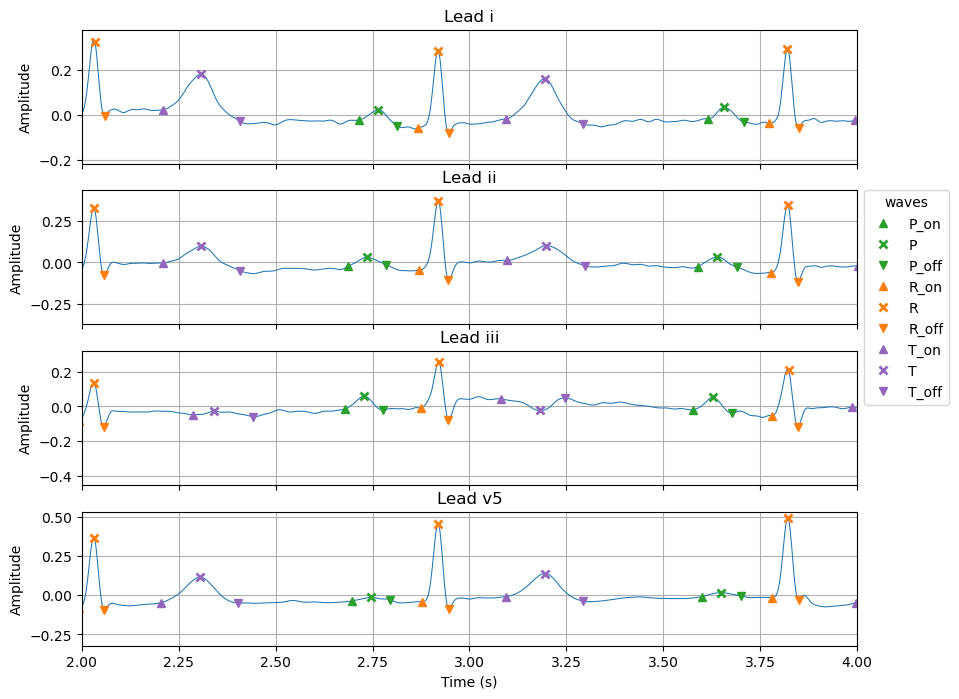

In [6]:
# Load unfiltered Data
leads = ['i', 'ii', 'iii', "v5"]
time, multilead_ecg, fs, multilead_annotations = load_multilead_ecg(record_name="2", leads=leads)

# Create an instance of the ProminenceDelineator
PromDelineator = ProminenceDelineator(sampling_frequency=fs)

# Detect the R-peaks in the ECG signal
multilead_rpeaks = PromDelineator.find_rpeaks(multilead_ecg)

# Clean the ECG signal
multilead_ecg = PromDelineator.clean_ecg(multilead_ecg)

# Find waves in the ECG signal using the find_waves function
multilead_waves = PromDelineator.find_waves_multilead(multilead_ecg, rpeaks_multilead=multilead_rpeaks)

plot_multilead_ecg_annotations(time, multilead_ecg, multilead_waves, leads, xlim=[2, 4])
